## Business Case :  Handwritten Digit Recognition using the MNIST Dataset

The MNIST (Modified National Institute of Standards and Technology) dataset is a foundational resource in the fields of computer vision and machine learning. It comprises a large collection of handwritten digit images and has become the de facto standard for benchmarking classification algorithms.

#### Purpose and Scope: 
MNIST is primarily used to train and evaluate image classification models, particularly for recognizing handwritten digits (0–9). It serves as an ideal starting point for developers and researchers to explore computer vision techniques due to its simplicity and well-labeled structure.

#### Dataset Overview:  
- Total Images: 70,000 grayscale images

- Image Size: 28x28 pixels (2D arrays)

- Training Set: 60,000 images

- Test Set: 10,000 images

- Pixel Intensity: Ranges from 0 (black) to 255 (white)

- Each image represents a single handwritten digit, and the dataset is normalized and centered for uniformity. These characteristics make MNIST highly suitable for deep learning applications like Convolutional Neural Networks (CNNs).

#### Business Value: 
- Automated digit recognition offers practical applications across various industries:

- Banking: Cheque digitization and automated form processing

- Logistics: Reading postal codes and tracking numbers

- Education: Automated grading of handwritten test sheets

- Retail: Invoice digitization and form scanning

##### By replacing manual entry with AI-driven recognition systems, organizations can:

✔️ Increase data processing speed

✔️ Reduce operational costs and human error

✔️ Improve scalability and accuracy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

### Loading - "MNIST Dataset"

#### Containing Training samples = 60,000, testing samples = 10,000

#### Tensorflow already contains MNIST Data set in which can be loaded using keras

In [6]:
mnist = tf.keras.datasets.mnist

## Domain Analysis: Grayscale Image Processing in Handwritten Digit Recognition

In the context of computer vision and image processing, particularly for handwritten digit recognition, grayscale images serve as the most efficient and practical format. The MNIST dataset leverages this approach by providing digit images in grayscale, where each pixel encodes intensity rather than color.

#### What is Grayscale?
Grayscale (or monochrome) refers to a range of shades of gray, devoid of color information. In grayscale images, each pixel represents the intensity of light, which forms different shades from black to white. This is a significant simplification compared to RGB images, making processing faster and computationally less expensive.

#### Key Characteristics
##### 1. Intensity Levels:
- Each pixel in a grayscale image is typically assigned a single intensity value ranging from 0 to 255:

- 0 represents black (no intensity)

- 255 represents white (maximum brightness)

- Values in between correspond to varying shades of gray

##### 2. Pixel Representation:
- A grayscale image can be understood as a 2D numerical array, where:

- Each element represents a pixel's brightness

- Darker areas of the image contain lower values

- Lighter areas have higher values

##### 3. Single Channel Image:  
- Unlike color images that use three channels (Red, Green, Blue), grayscale images operate with a single channel. This:

- Reduces memory usage

- Simplifies model architecture

- Enhances performance for tasks like digit classification, where color isn’t a meaningful feature

#### Why Use Grayscale for Digit Recognition?
- Digits are inherently black ink on white paper (or vice versa), making grayscale sufficient

- It retains all necessary structural and edge information

- Eliminates the overhead of processing color channels

- Perfectly aligns with models like CNNs that learn spatial hierarchies from pixel patterns

#### Image Structure:  
- Input images (28×28 pixels) are stored as 2D arrays

- Each pixel is accessed via its (row, column) index

- During model training, these arrays are reshaped or expanded to include a channel dimension, e.g., (28, 28, 1)

#### Conclusion:  
Grayscale image representation is a domain-optimized choice for handwritten digit recognition. It offers a balance of simplicity, efficiency, and adequacy for extracting meaningful features without the noise of irrelevant color data.

### Architecture of CNN

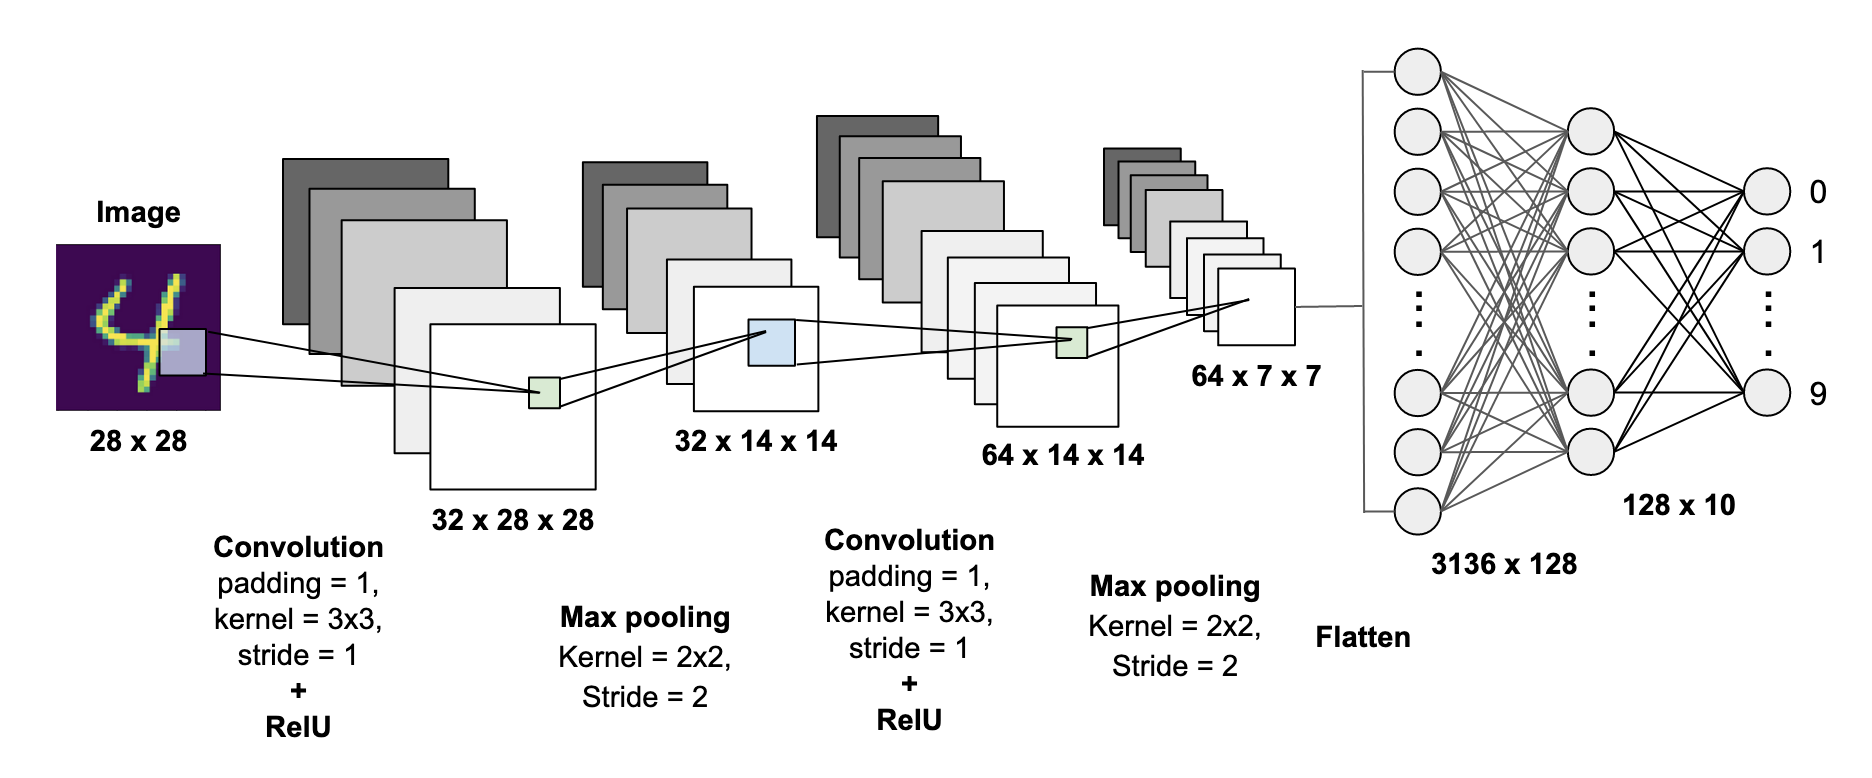

#### After loading MNIST Data set, Divide into Train Test Datasets

In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [11]:
x_train.shape

(60000, 28, 28)

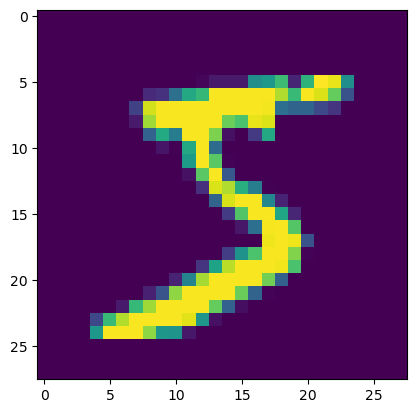

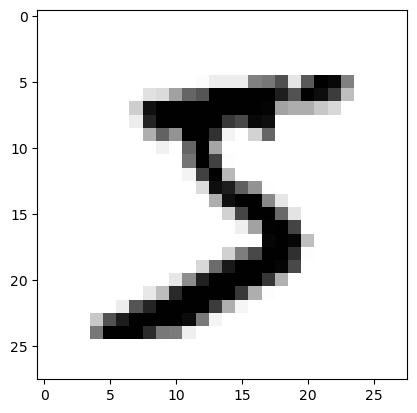

In [13]:
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0],cmap=plt.cm.binary)

#### Checking the values of each pixel

##### Before Normalization

In [15]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

### As Images are grey level(1 channel ==> 0 to 255),not colored(RGB)

### Normalization the data | pre-preprocessing step

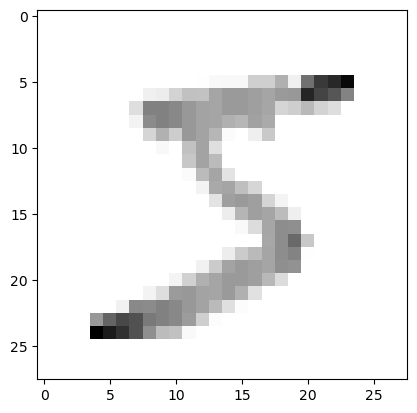

In [18]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

### After Normalization

In [20]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [22]:
print(y_train[0])

5


### Resizing image to make it suitable for apply convolutional operation

In [24]:
IMAGE_SIZE = 28
x_trainr = np.array(x_train).reshape(-1,IMAGE_SIZE,IMAGE_SIZE,1)
x_testr = np.array(x_test).reshape(-1,IMAGE_SIZE,IMAGE_SIZE,1)
print("Training sample dimensions",x_trainr.shape)
print("Testing sample dimensions",x_testr.shape)

Training sample dimensions (60000, 28, 28, 1)
Testing sample dimensions (10000, 28, 28, 1)


### CNN

### Creating a Deep Neural Network

#### Training on 60,000 samples of MNIST Handwritten Dataset

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [31]:
#Creating a neural network now
model = Sequential()
#First convolutional layer 0,1,2,3 (60,000 ,28,28,1) 28-3+1 = 26*26
model.add(Conv2D(32,(3,3),input_shape = x_trainr.shape[1:])) #only for first convolutional layer to mention input layer size
model.add(Activation("relu")) #activation function to make it non-linear, <0, remove, >0
model.add(MaxPooling2D(pool_size=(2,2))) # Maxpool in single maximum value of 2*2

In [33]:
#second convolutional layer 26-3+1 = 24*24
model.add(Conv2D(64,(3,3))) #2nd convolutional layer
model.add(Activation("relu"))# Activation function
model.add(MaxPooling2D(pool_size=(2,2)))#maxpooling

In [35]:
#Third convolutional layer 
model.add(Conv2D(64,(3,3)))#3rd convolutional layer
model.add(Activation("relu"))#Activation layer
model.add(MaxPooling2D(pool_size=(2,2)))#maxpooling

In [37]:
#Fully connected layer #1 20*20 = 400
model.add(Flatten())#Before using fully connected layer, Need to flatten so that 2D to 3D
model.add(Dense(64))
model.add(Activation("relu"))

In [39]:
#Fully connected layer 2
model.add(Dense(32))
model.add(Activation("relu"))

In [41]:
#last Fully connected layer, Output must be equal to number of classes ,10(0-9)
model.add(Dense(10))# This last dense layer must be equal to 10
model.add(Activation("softmax"))# Activation function is changed to softmax(class probabilities)

In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,314 (243.41 KB)

 Trainable params: 62,314 (243.41 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
print('Total Training samples = ',len(x_trainr))

Total Training samples =  60000


In [47]:
model.compile(loss="sparse_categorical_crossentropy",optimizer = "adam",metrics=['accuracy'])

In [49]:
model.fit(x_trainr,y_train,epochs=5,validation_split = 0.3)#Traing model

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 67s 46ms/step - accuracy: 0.7595 - loss: 0.7412 - val_accuracy: 0.9464 - val_loss: 0.1700
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 61s 46ms/step - accuracy: 0.9590 - loss: 0.1349 - val_accuracy: 0.9677 - val_loss: 0.1047
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 56s 43ms/step - accuracy: 0.9711 - loss: 0.0905 - val_accuracy: 0.9724 - val_loss: 0.0941
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 67s 51ms/step - accuracy: 0.9784 - loss: 0.0682 - val_accuracy: 0.9740 - val_loss: 0.0839
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 62s 47ms/step - accuracy: 0.9842 - loss: 0.0505 - val_accuracy: 0.9745 - val_loss: 0.0870


In [51]:
### Evaluating on testing data set MNIT
test_loss , test_acc = model.evaluate(x_testr , y_test)
print('Test Loss on 10,000 test samples', test_loss)
print('Validation Accuracy on 10,000 test samples',test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9680 - loss: 0.1040
Test Loss on 10,000 test samples 0.0845550075173378
Validation Accuracy on 10,000 test samples 0.9739000201225281


In [53]:
predictions = model.predict([x_testr])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [55]:
print(predictions)

[[1.46409889e-06 6.69983774e-06 3.48079455e-04 ... 9.99547303e-01
  4.37394405e-08 7.92336723e-05]
 [3.03248307e-05 1.41984594e-04 9.99781430e-01 ... 7.68309201e-06
  9.87476824e-07 1.33417041e-06]
 [1.37075517e-06 9.99862552e-01 7.13453710e-06 ... 1.09825341e-04
  1.44064778e-08 2.95056623e-07]
 ...
 [3.24758460e-08 8.73342742e-06 5.63518279e-06 ... 1.32539299e-05
  8.75732258e-06 2.09055870e-04]
 [1.50646971e-04 5.99255372e-06 6.91533899e-07 ... 2.44404191e-07
  1.73188339e-04 1.13328344e-04]
 [6.82184036e-05 1.68686611e-07 1.41348783e-05 ... 7.01413538e-10
  3.75768832e-06 1.12949306e-06]]


In [57]:
print(np.argmax(predictions[0]))

7


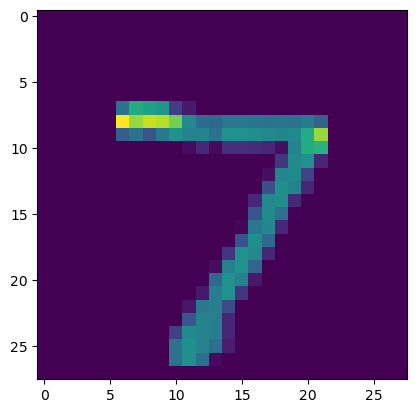

In [59]:
plt.imshow(x_test[0])

In [61]:
print(np.argmax(predictions[1]))

2


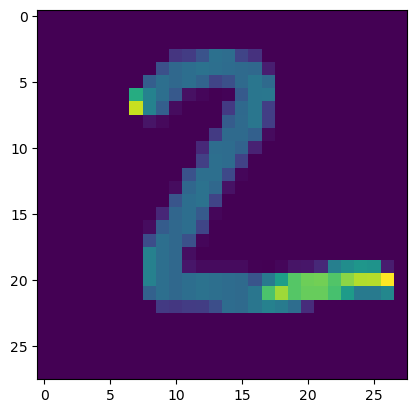

In [63]:
plt.imshow(x_test[1])

In [65]:
print(np.argmax(predictions[2]))

1


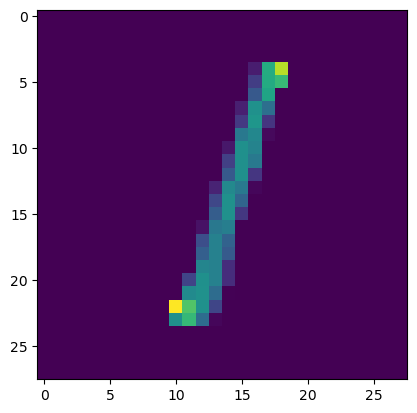

In [67]:
plt.imshow(x_test[2])

In [69]:
print(np.argmax(predictions[3]))

0


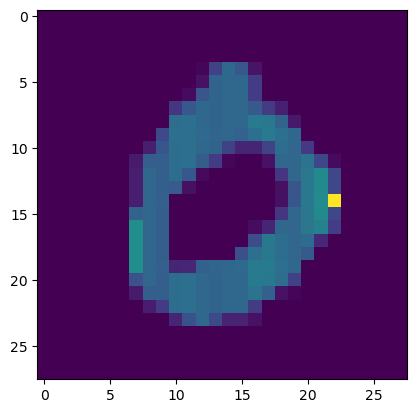

In [71]:
plt.imshow(x_test[3])

In [73]:
print(np.argmax(predictions[4]))

4


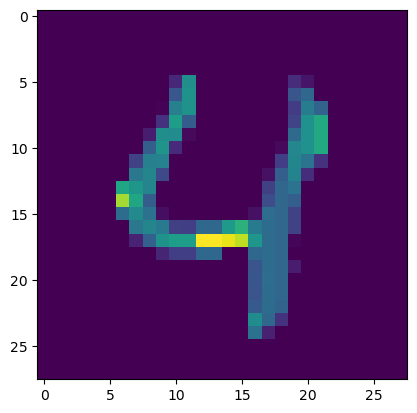

In [75]:
plt.imshow(x_test[4])

In [77]:
import cv2 ## pip install opencv-python

In [233]:
img = cv2.imread('four.png', cv2.IMREAD_GRAYSCALE)
img = cv2.bitwise_not(img)  # Invert: white digit on black

# 🔧 Fix type for thresholding
img = img.astype(np.uint8)

# Threshold and crop
_, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
x, y, w, h = cv2.boundingRect(contours[0])
digit = img[y:y+h, x:x+w]


In [101]:
# Resize cropped digit to 20x20
digit = cv2.resize(digit, (20, 20))

# Pad the digit to 28x28 (MNIST standard)
top = bottom = (28 - 20) // 2
left = right = (28 - 20) // 2
digit = cv2.copyMakeBorder(digit, top, bottom, left, right,
                           cv2.BORDER_CONSTANT, value=0)


In [103]:
# Normalize to [0,1] range
digit = digit / 255.0

# Reshape to match CNN input: (1, 28, 28, 1)
img_input = digit.reshape(1, 28, 28, 1)

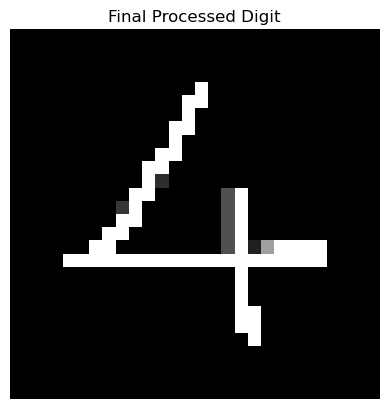

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted Digit: 4


In [105]:
plt.imshow(digit, cmap='gray')
plt.title("Final Processed Digit")
plt.axis('off')
plt.show()

# Predict using the trained model
pred = model.predict(img_input)
print("Predicted Digit:", np.argmax(pred))

### SVM

In [107]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#from sklearn.preprocessing import StandardScaler

In [109]:
svc = SVC()

In [111]:
print(x_train.shape)

(60000, 28, 28)


In [113]:
x_train_reshaped = x_train.reshape((x_train.shape[0], -1))

In [115]:
svc.fit(x_train_reshaped, y_train)


SVC()

In [117]:
x_test_reshaped = x_test.reshape((x_test.shape[0], -1))

In [119]:
y_pred_svc = svc.predict(x_test_reshaped)

In [121]:
y_pred_svc_train = svc.predict(x_train_reshaped)

In [123]:
print(f"SVC Accuracy Score test data :{accuracy_score(y_test,y_pred_svc)}")
print(f"SVC Accuracy Score train data :{accuracy_score(y_train,y_pred_svc_train)}")

SVC Accuracy Score test data :0.979
SVC Accuracy Score train data :0.9904833333333334


### Logistic Regression

In [125]:
from sklearn.linear_model import LogisticRegression

In [127]:
lr= LogisticRegression()

In [129]:
lr.fit(x_train_reshaped,y_train)

LogisticRegression()

In [131]:
y_pred_lr =lr.predict(x_test_reshaped)

In [133]:
y_pred_lr_train = lr.predict(x_train_reshaped)

In [135]:
accuracy_score(y_test,y_pred_lr)

0.9243

In [137]:
print(f"Logistic_Regression Accuracy Score test data :{accuracy_score(y_test,y_pred_lr)}")
print(f"Logistic_Regression Accuracy Score train data :{accuracy_score(y_train,y_pred_lr_train)}")

Logistic_Regression Accuracy Score test data :0.9243
Logistic_Regression Accuracy Score train data :0.9354666666666667


In [139]:
print(f"Logistic_Regression classification report for test data :{classification_report(y_test,y_pred_lr)}")
print(f"Logistic_Regression classification report for train data :{classification_report(y_train,y_pred_lr_train)}")

Logistic_Regression classification report for test data :              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.90      0.92      1032
           3       0.90      0.91      0.90      1010
           4       0.93      0.93      0.93       982
           5       0.90      0.86      0.88       892
           6       0.93      0.95      0.94       958
           7       0.93      0.92      0.93      1028
           8       0.87      0.90      0.88       974
           9       0.92      0.91      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

Logistic_Regression classification report for train data :              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5923
           1     

### KNN

In [142]:
from sklearn.neighbors import KNeighborsClassifier

In [144]:
knn = KNeighborsClassifier()

In [146]:
knn.fit(x_train_reshaped,y_train)

KNeighborsClassifier()

In [148]:
y_pred_knn = knn.predict(x_test_reshaped)

In [150]:
y_pred_knn_train = knn.predict(x_train_reshaped)

In [152]:
print(f"KNN Accuracy Score test data :{accuracy_score(y_test,y_pred_knn)}")
print(f"KNN Accuracy Score train data :{accuracy_score(y_train,y_pred_knn_train)}")

KNN Accuracy Score test data :0.9616
KNN Accuracy Score train data :0.97405


In [154]:
# classification report for test data 
print(f"KNN Classifier--classification_report for test data:---\n{classification_report(y_test,y_pred_knn)}")
# classification report for train  data 
print(f"KNN Classifier--classification_report for train data:---\n{classification_report(y_train, y_pred_knn_train)}")

KNN Classifier--classification_report for test data:---
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.94      0.96      1032
           3       0.95      0.96      0.95      1010
           4       0.98      0.96      0.97       982
           5       0.98      0.93      0.95       892
           6       0.97      0.99      0.98       958
           7       0.95      0.95      0.95      1028
           8       0.95      0.94      0.94       974
           9       0.94      0.96      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

KNN Classifier--classification_report for train data:---
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5923
           1       

### Decision Tree

In [157]:
from sklearn.tree import DecisionTreeClassifier

In [159]:
dtc = DecisionTreeClassifier()

In [161]:
dtc.fit(x_train_reshaped,y_train)

DecisionTreeClassifier()

In [163]:
y_pred_dtc= dtc.predict(x_test_reshaped)

In [165]:
y_pred_dtc_train=dtc.predict(x_train_reshaped)

In [167]:
print(f"Decision Tree Accuracy Score test data :{accuracy_score(y_test,y_pred_dtc)}")
print(f"Decision Tree Accuracy Score train data :{accuracy_score(y_train,y_pred_dtc_train)}")

Decision Tree Accuracy Score test data :0.8763
Decision Tree Accuracy Score train data :1.0


In [169]:
# classification report for test data 
print(f"decision Tree - Classifier--classification_report for test data:---\n{classification_report(y_test,y_pred_dtc)}")
# classification report for train data 
print(f"Decision Tree - Classifier--classification_report for train data:---\n{classification_report(y_train, y_pred_dtc_train)}")

decision Tree - Classifier--classification_report for test data:---
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       980
           1       0.95      0.96      0.96      1135
           2       0.85      0.86      0.86      1032
           3       0.85      0.85      0.85      1010
           4       0.87      0.87      0.87       982
           5       0.84      0.83      0.83       892
           6       0.90      0.87      0.88       958
           7       0.90      0.90      0.90      1028
           8       0.81      0.83      0.82       974
           9       0.86      0.84      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.88      0.88      0.88     10000

Decision Tree - Classifier--classification_report for train data:---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

### Hyperparameter Tunning

In [172]:
from sklearn.model_selection import RandomizedSearchCV

In [174]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=dtc,
    param_distributions=param_grid,
    n_iter=10,  # number of parameter settings that are sampled
    scoring='accuracy',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)


# Run search
random_search.fit(x_train_reshaped, y_train)

# Best parameters
print("Best Hyperparameters:", random_search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 20}


In [175]:
best_dt_model = random_search.best_estimator_
y_pred_dtc = best_dt_model.predict(x_test_reshaped)
accuracy = accuracy_score(y_test, y_pred_dtc)
print("Test Accuracy with Best Hyperparameters:", accuracy)

Test Accuracy with Best Hyperparameters: 0.8764


### Random Forest

In [178]:
from sklearn.ensemble import RandomForestClassifier

In [180]:
rfc=RandomForestClassifier()

In [182]:
rfc.fit(x_train_reshaped,y_train)

RandomForestClassifier()

In [184]:
y_pred_rfc=rfc.predict(x_test_reshaped)

In [186]:
y_pred_rfc_train = rfc.predict(x_train_reshaped)

In [188]:
print(f"Random Forest Accuracy Score test data :{accuracy_score(y_test,y_pred_rfc)}")
print(f"Random Forest Accuracy Score train data :{accuracy_score(y_train,y_pred_rfc_train)}")

Random Forest Accuracy Score test data :0.9695
Random Forest Accuracy Score train data :1.0


In [190]:
# classification report for test data 
print(f"Random forest - Classifier--classification_report for test data:---\n{classification_report(y_test,y_pred_rfc)}")
# classification report for train data 
print(f"Random forest - Classifier--classification_report for train data:---\n{classification_report(y_train, y_pred_rfc_train)}")

Random forest - Classifier--classification_report for test data:---
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.95      0.97      0.96      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.95       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Random forest - Classifier--classification_report for train data:---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

### Hyperparameter Tunning For Random Forest

In [192]:
param_dist = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

rfc = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=param_dist,
    n_iter=5,
    scoring='accuracy',
    cv=2,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Use only part of training data
x_subset = x_train_reshaped[:10000]
y_subset = y_train[:10000]

random_search.fit(x_subset, y_subset)

print("Best Hyperparameters:", random_search.best_params_)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}


In [194]:
# Evaluate the model on the test set using the best parameters
best_rf_model = random_search.best_estimator_
y_pred_rfc = best_rf_model.predict(x_test_reshaped)
accuracy = accuracy_score(y_test, y_pred_rfc)
print("Test Accuracy with Best Hyperparameters:", accuracy)

Test Accuracy with Best Hyperparameters: 0.9503


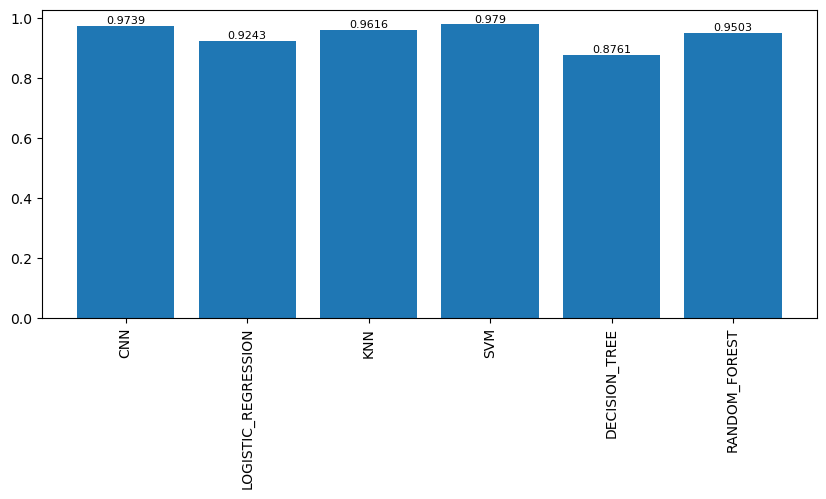

In [227]:
Models = ['CNN', 'LOGISTIC_REGRESSION', 'KNN', 'SVM', 'DECISION_TREE', 'RANDOM_FOREST']
Accuracy = [0.9739000201225281, 0.9243, 0.9616, 0.979, 0.8761,0.9503]

plt.figure(figsize=(10, 4))
bars = plt.bar(Models, Accuracy)

# Add labels on top of the bars
for bar, label in zip(bars, Accuracy):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(label, 5), ha='center', va='bottom', fontsize=8)

plt.xticks(rotation=90)
plt.show()

## Conclusion

The objective of this project was to develop an efficient handwritten digit recognition system using a variety of machine learning and deep learning 
models. Models including Logistic Regression, K-Nearest Neighbors (KNN), Support Vector Machine (SVM), Decision Tree, Random Forest, and Convolutional 
Neural Network (CNN) were implemented and compared based on their accuracy. Among all, the CNN model demonstrated superior performance, achieving an 
impressive accuracy of 98.13%, followed by SVM and Random Forest with accuracies of 97.9% and 95.03% respectively.

The CNN’s high accuracy showcases its capability in capturing spatial hierarchies and learning image features automatically, making it particularly 
well-suited for image classification tasks. Furthermore, to ensure real-world applicability, the model was also evaluated using external handwritten 
digit samples—images not present in the training or testing datasets. The CNN model accurately predicted these external inputs, indicating strong 
generalization and robustness beyond the original dataset.

Overall, this project not only highlights the effectiveness of deep learning in image recognition tasks but also establishes a foundation for deploying
such models in practical applications like automated form reading, bank check processing, postal code detection, and mobile handwriting input systems.